# Тема "Визуализация данных в Python"

In [1]:
import pandas as pd
import matplotlib # библиотека для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# В данной работе используются файлы с данными из темы №5.
df = pd.read_csv('Модуль 1_Тема 5. Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


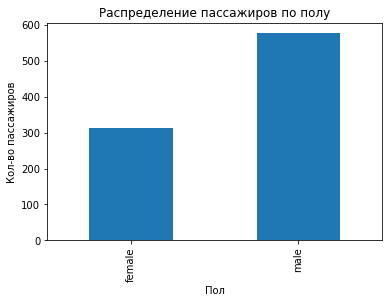

In [4]:
# Гистограмма распределения пассажиров по полу
df[['PassengerId','Sex']].groupby('Sex').count().plot(kind='bar', legend=False)
plt.title('Распределение пассажиров по полу')
plt.xlabel('Пол')
plt.ylabel('Кол-во пассажиров')
plt.show()

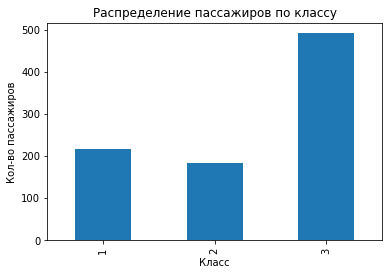

In [5]:
# Гистограмма распределения пассажиров по классу
df[['PassengerId','Pclass']].groupby('Pclass').count().plot(kind='bar', legend=False)
plt.title('Распределение пассажиров по классу')
plt.xlabel('Класс')
plt.ylabel('Кол-во пассажиров')
plt.show()

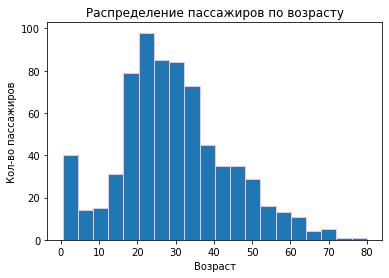

In [6]:
# Гистограмма распределения пассажиров по возрасту
plt.hist(df['Age'],bins =20, edgecolor = 'pink')
plt.title('Распределение пассажиров по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пассажиров')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


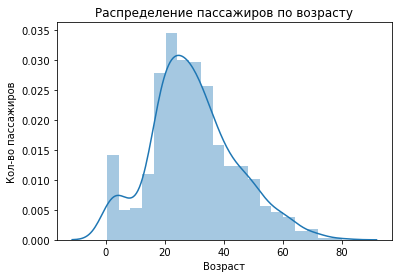

In [7]:
# Гистограмма распределения пассажиров по возрасту с огибающей линией
sns.distplot(df['Age'])
plt.title('Распределение пассажиров по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пассажиров')
plt.show()

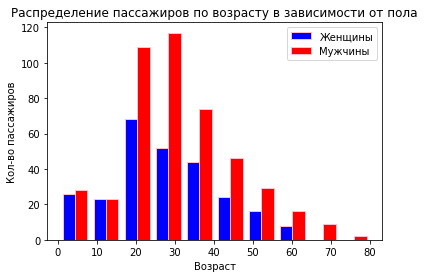

In [8]:
# Гистограммы распределения пассажиров по возрасту в зависимости от пола (все на одном графике)
F = df[(df['Sex']=='female')]
M = df[(df['Sex']=='male')]
plt.hist([F['Age'], M['Age']],color=[ "b", "r"], edgecolor = 'pink', label=['Женщины','Мужчины'])
plt.legend()
plt.xlabel('Возраст')
plt.ylabel('Кол-во пассажиров')
plt.title('Распределение пассажиров по возрасту в зависимости от пола')
plt.show()

	Age and Sex frequency


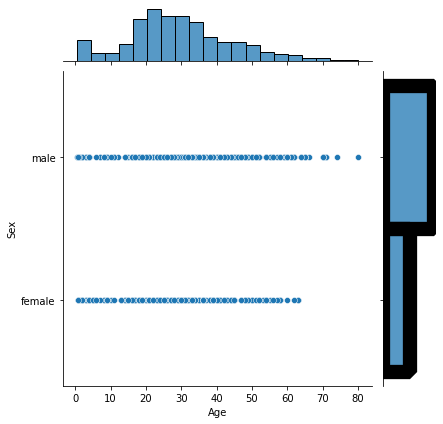

In [9]:
# другой вариант
print("\tAge and Sex frequency")
e=sns.jointplot(x='Age', y='Sex', data=df, kind='scatter');

In [10]:
# Визуализация сводной таблицы 
df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count') #число выживших/погибших по классу

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


	Pivot table


<AxesSubplot:xlabel='Pclass'>

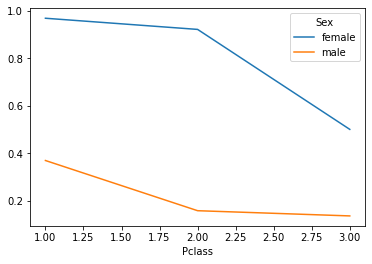

In [11]:
f=df.pivot_table('Survived', index='Pclass', columns='Sex')
print("\tPivot table")
f.plot()
# Один из вариантов визуализации

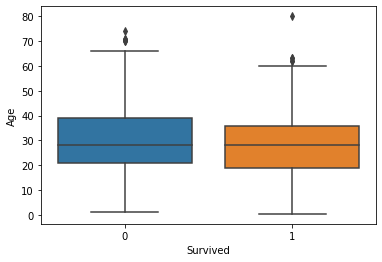

In [12]:
# «Ящик с усами» для зависимости возраст – выжил 
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x="Survived", y="Age", data=df)